In [1]:
import torch as t 
import torchvision
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pylab as plt
from torch.nn.utils import clip_grad_value_
%matplotlib inline
import pickle
from torchvision import datasets, transforms
import tqdm
import os
import sys
sys.path.append('../src/')

In [25]:
import importlib 
import linear_var_hypernet as linear_var_hypernet
import var_net as var_net
import mnist_utils as utils
importlib.reload(utils)
importlib.reload(var_net)
importlib.reload(linear_var_hypernet)



<module 'linear_var_hypernet' from '../src/linear_var_hypernet.py'>

In [8]:
device = 'cuda' # cuda or cpu
device = t.device(device)
if device == 'cuda':
    t.backends.cudnn.deterministic = True
    t.backends.cudnn.benchmark = False

In [22]:
batch_size = 256
init_log_sigma = -3.0 # логарифм дисперсии вариационного распределения при инициализации
prior_sigma = .1 # априорная дисперсия
epoch_num = 25 #количество эпох
lamb = [0.01, 0.1, 1.0,  10.0, 100.0]
lamb = [t.tensor(l) for l in lamb]
hidden_num = 50 # количество нейронов на скрытом слое
acc_delete = [] 
start_num = 5
path_to_save = 'saved_mnist'
lambda_sample_num = 5
lambda_encode = t.log 

if not os.path.exists(path_to_save):
    os.mkdir(path_to_save)

In [13]:
# загрузка данных
train_data = torchvision.datasets.MNIST('./files/', train=True, download=True,
                             transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                                  torchvision.transforms.Lambda(lambda x: x.view(-1))
                              ]))

test_data = torchvision.datasets.MNIST('./files/', train=False, download=True,
                             transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                                  torchvision.transforms.Lambda(lambda x: x.view(-1))
                              ]))


train_loader = t.utils.data.DataLoader(train_data, batch_size=batch_size, pin_memory=True )
test_loader = t.utils.data.DataLoader(test_data, batch_size=batch_size)





In [24]:
t.manual_seed(0)

for start in range(start_num):                    
        net = var_net.VarNet(linear_var_hypernet.VarLayerLinearAppr(784,  hidden_num, prior_sigma=prior_sigma, init_log_sigma=init_log_sigma),
                     linear_var_hypernet.VarLayerLinearAppr(hidden_num, 10,  prior_sigma=prior_sigma, act=lambda x:x, init_log_sigma=init_log_sigma))

        net = net.to(device)
        optim = t.optim.Adam(net.parameters(), lr=5e-4)
        loss_fn = nn.CrossEntropyLoss().to(device)            
        for e in range(epoch_num):
            label = 'epoch {}: '.format(e)                
            utils.train_batches_hypernet(train_loader,  len(train_data), lambda_sample_num,
                  lambda_encode, net, device, loss_fn, optim, label)
            if e%5 == 0:
                print (utils.test_acc_hyper(net, device, test_loader, lambda_encode, lamb))
        t.save(net.state_dict(), os.path.join(path_to_save, 'var_linear_start_{}.cpk'.format(start)))

epoch 1: 9.450312:   1%|          | 2/235 [00:00<00:18, 12.78it/s]

{tensor(0.0100): 0.7914, tensor(0.1000): 0.766, tensor(1.): 0.4746, tensor(10.): 0.8231, tensor(100.): 0.8445}


epoch 6: 0.3472876:   1%|          | 2/235 [00:00<00:16, 13.82it/s]

{tensor(0.0100): 0.9234, tensor(0.1000): 0.9271, tensor(1.): 0.9135, tensor(10.): 0.894, tensor(100.): 0.8792}


epoch 11: 0.512615:   1%|          | 2/235 [00:00<00:19, 12.15it/s]

{tensor(0.0100): 0.9468, tensor(0.1000): 0.9479, tensor(1.): 0.938, tensor(10.): 0.9024, tensor(100.): 0.8755}


epoch 16: 0.40022564:   1%|          | 2/235 [00:00<00:19, 11.93it/s]

{tensor(0.0100): 0.956, tensor(0.1000): 0.9558, tensor(1.): 0.9459, tensor(10.): 0.9093, tensor(100.): 0.8514}


epoch 21: 0.2132684:   1%|          | 2/235 [00:00<00:21, 10.79it/s]

{tensor(0.0100): 0.9582, tensor(0.1000): 0.9601, tensor(1.): 0.9516, tensor(10.): 0.9082, tensor(100.): 0.8368}


epoch 1: 10.697416:   1%|          | 2/235 [00:00<00:18, 12.49it/s]

{tensor(0.0100): 0.7921, tensor(0.1000): 0.752, tensor(1.): 0.4202, tensor(10.): 0.8215, tensor(100.): 0.8404}


epoch 6: 1.4631535:   1%|          | 2/235 [00:00<00:14, 16.01it/s]

{tensor(0.0100): 0.9133, tensor(0.1000): 0.9175, tensor(1.): 0.9083, tensor(10.): 0.886, tensor(100.): 0.8956}


epoch 11: 0.77216226:   1%|          | 2/235 [00:00<00:16, 13.89it/s]

{tensor(0.0100): 0.9397, tensor(0.1000): 0.9388, tensor(1.): 0.9323, tensor(10.): 0.9121, tensor(100.): 0.8702}


epoch 16: 0.35066134:   1%|          | 2/235 [00:00<00:18, 12.32it/s]

{tensor(0.0100): 0.9542, tensor(0.1000): 0.9515, tensor(1.): 0.9414, tensor(10.): 0.9114, tensor(100.): 0.8492}


epoch 21: 0.24868366:   1%|          | 2/235 [00:00<00:19, 11.83it/s]

{tensor(0.0100): 0.9424, tensor(0.1000): 0.9529, tensor(1.): 0.9503, tensor(10.): 0.9197, tensor(100.): 0.8321}


epoch 1: 12.762907:   1%|          | 2/235 [00:00<00:16, 13.90it/s]

{tensor(0.0100): 0.6327, tensor(0.1000): 0.615, tensor(1.): 0.4081, tensor(10.): 0.8159, tensor(100.): 0.845}


epoch 6: 1.6682673:   1%|          | 2/235 [00:00<00:17, 13.53it/s]

{tensor(0.0100): 0.9206, tensor(0.1000): 0.919, tensor(1.): 0.899, tensor(10.): 0.888, tensor(100.): 0.8426}


epoch 11: 1.7885172:   1%|          | 2/235 [00:00<00:15, 14.76it/s]

{tensor(0.0100): 0.9391, tensor(0.1000): 0.9395, tensor(1.): 0.9319, tensor(10.): 0.9036, tensor(100.): 0.8626}


epoch 16: 0.5210781:   1%|          | 2/235 [00:00<00:16, 14.49it/s]

{tensor(0.0100): 0.9512, tensor(0.1000): 0.9527, tensor(1.): 0.9442, tensor(10.): 0.9044, tensor(100.): 0.7593}


epoch 21: 0.40977687:   1%|          | 2/235 [00:00<00:16, 14.46it/s]

{tensor(0.0100): 0.9526, tensor(0.1000): 0.9561, tensor(1.): 0.9493, tensor(10.): 0.91, tensor(100.): 0.8252}


epoch 1: 9.483836:   1%|          | 2/235 [00:00<00:15, 15.25it/s] 

{tensor(0.0100): 0.7842, tensor(0.1000): 0.7428, tensor(1.): 0.4298, tensor(10.): 0.7656, tensor(100.): 0.7719}


epoch 6: 2.8176568:   1%|          | 2/235 [00:00<00:15, 15.04it/s]

{tensor(0.0100): 0.9219, tensor(0.1000): 0.9236, tensor(1.): 0.9082, tensor(10.): 0.8956, tensor(100.): 0.8795}


epoch 11: 1.2316843:   1%|          | 2/235 [00:00<00:18, 12.64it/s]

{tensor(0.0100): 0.9438, tensor(0.1000): 0.9451, tensor(1.): 0.9369, tensor(10.): 0.9015, tensor(100.): 0.8257}


epoch 16: 0.29126692:   1%|          | 2/235 [00:00<00:14, 16.00it/s]

{tensor(0.0100): 0.9491, tensor(0.1000): 0.9529, tensor(1.): 0.947, tensor(10.): 0.9157, tensor(100.): 0.8097}


epoch 21: 0.27668452:   1%|          | 2/235 [00:00<00:19, 12.17it/s]

{tensor(0.0100): 0.9529, tensor(0.1000): 0.96, tensor(1.): 0.9533, tensor(10.): 0.9068, tensor(100.): 0.7058}


epoch 1: 15.659763:   1%|          | 2/235 [00:00<00:15, 15.22it/s]

{tensor(0.0100): 0.7965, tensor(0.1000): 0.7576, tensor(1.): 0.4651, tensor(10.): 0.7729, tensor(100.): 0.7976}


epoch 6: 3.5030277:   1%|          | 2/235 [00:00<00:16, 14.35it/s]

{tensor(0.0100): 0.9242, tensor(0.1000): 0.9261, tensor(1.): 0.9127, tensor(10.): 0.8931, tensor(100.): 0.8881}


epoch 11: 1.0412058:   1%|          | 2/235 [00:00<00:17, 13.29it/s]

{tensor(0.0100): 0.945, tensor(0.1000): 0.9457, tensor(1.): 0.9349, tensor(10.): 0.8979, tensor(100.): 0.8638}


epoch 16: 0.46966156:   1%|          | 2/235 [00:00<00:15, 14.72it/s]

{tensor(0.0100): 0.9536, tensor(0.1000): 0.954, tensor(1.): 0.9454, tensor(10.): 0.9086, tensor(100.): 0.8052}


epoch 21: 0.36448663:   1%|          | 2/235 [00:00<00:14, 15.63it/s]

{tensor(0.0100): 0.9561, tensor(0.1000): 0.9581, tensor(1.): 0.9505, tensor(10.): 0.9151, tensor(100.): 0.7831}


epoch 24: 0.28414476: 100%|██████████| 235/235 [00:17<00:00, 13.24it/s]


In [28]:
net = var_net.VarNet(var_net.VarLayer(784,  hidden_num, 
                                            prior_sigma = prior_sigma, init_log_sigma=init_log_sigma), 
                                 var_net.VarLayer(hidden_num, 10, prior_sigma=prior_sigma,  init_log_sigma=init_log_sigma,
                                          act=lambda x:x)).to(device)    
hnet = var_net.VarNet(linear_var_hypernet.VarLayerLinearAppr(784,  hidden_num, prior_sigma=prior_sigma, init_log_sigma=init_log_sigma),
                     linear_var_hypernet.VarLayerLinearAppr(hidden_num, 10,  prior_sigma=prior_sigma, act=lambda x:x, init_log_sigma=init_log_sigma))

hnet = hnet.to(device)
net = net.to(device)
lam_results = {}
for lam in lamb:
    lam_results[lam] = []
    for s in range(start_num):        
        print (lam, s)
        hnet.load_state_dict(t.load(os.path.join(path_to_save, 'var_linear_start_{}.cpk'.format(s))))        
        utils.net_copy(hnet, net, lambda_encode(t.ones(1).to(device)[0]*lam))
        lam_results[lam].append(utils.delete_10(net, device, lambda:utils.test_acc_net(net, device, test_loader)))
lam_results = {float(k):lam_results[k] for k in lam_results}
import json
with open(os.path.join(path_to_save, 'results_var_linear.json'),'w') as out:
    out.write(json.dumps(lam_results))  

../src/var_net.py:9: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  t.nn.init.xavier_uniform(self.mean)
../src/linear_var_hypernet.py:74: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  t.nn.init.xavier_uniform(self.const,  init_const)
../src/linear_var_hypernet.py:76: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  t.nn.init.xavier_uniform(self.const2,  init_const2)


tensor(0.0100) 0
tensor(0.0100) 1
tensor(0.0100) 2
tensor(0.0100) 3
tensor(0.0100) 4
tensor(0.1000) 0
tensor(0.1000) 1
tensor(0.1000) 2
tensor(0.1000) 3
tensor(0.1000) 4
tensor(1.) 0
tensor(1.) 1
tensor(1.) 2
tensor(1.) 3
tensor(1.) 4
tensor(10.) 0
tensor(10.) 1
tensor(10.) 2
tensor(10.) 3
tensor(10.) 4
tensor(100.) 0
tensor(100.) 1
tensor(100.) 2
tensor(100.) 3
tensor(100.) 4


TypeError: keys must be str, int, float, bool or None, not Tensor

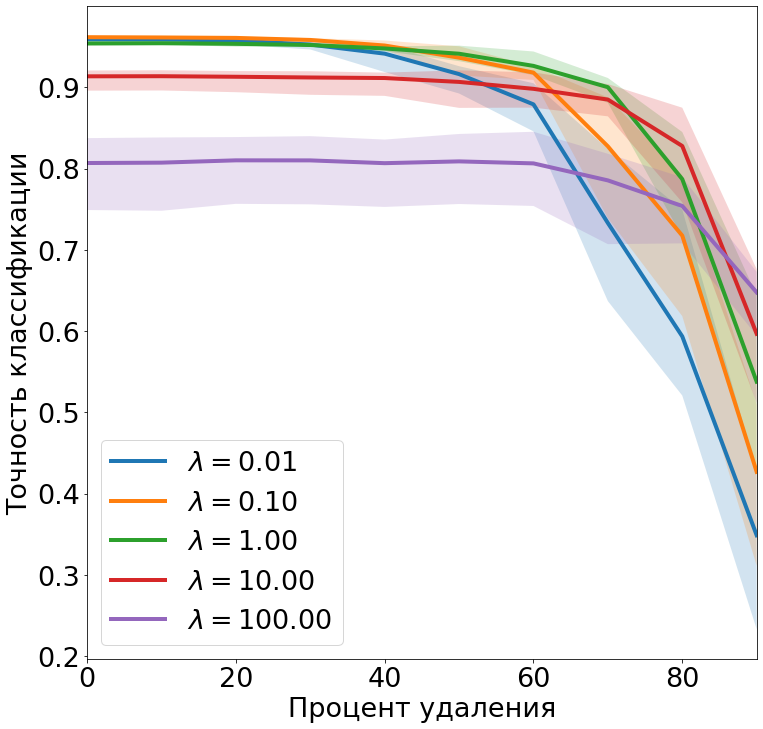

In [37]:
proc = [0,10,20,30,40,50,60,70,80,90]
plt.rcParams['figure.figsize'] = 12, 12
plt.rcParams.update({'font.size': 27})
plt.rc('lines', linewidth=4)
    
    
for lam in lamb:
    lam = float(lam)
    lam_str = "{:10.2f}".format(lam)

    plt.fill_between(proc, np.min(lam_results[lam], 0), np.max(lam_results[lam], 0), alpha=0.2)
    plt.plot(proc, np.mean(lam_results[lam], 0), label='$\lambda={}$'.format(lam_str))
plt.ylabel('Точность классификации', fontsize = 27)
plt.xlabel('Процент удаления', fontsize = 27)
plt.tick_params(axis='both', which='major', labelsize=27)
plt.legend(loc='lower left')
plt.autoscale(enable=True, axis='x', tight=True)
plt.savefig('Linear_var')
#plt.show()
